In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [4]:
tdf_url = "https://raw.githubusercontent.com/Ashique-1010/Datasets-for-EDA-ML/main/truth.csv"

tdf = pd.read_csv(tdf_url)

tdf.columns = ['time', 'Px', 'Py', 'Pz', 'Vx', 'Vy', 'Vz', 'q0', 'q1', 'q2', 'qs']
tdf.time = pd.to_datetime(tdf.time)
tdf.set_index(tdf.time, inplace=True)


In [5]:
tdf.drop('time', axis=1, inplace=True)
tdf

,Px,Py,Pz,Vx,Vy,Vz,q0,q1,q2,qs
time,,,,,,,,,,
2020-10-13 13:33:30.219040000,-1.387897e+06,-5.268929e+06,3.306578e+06,0.002200,-0.008110,0.004150,-0.458401,-0.176758,0.511475,0.704995
2020-10-13 13:33:30.229040128,-1.387897e+06,-5.268929e+06,3.306578e+06,0.001978,-0.008155,0.004144,-0.458401,-0.176758,0.511474,0.704996
2020-10-13 13:33:30.239040000,-1.387897e+06,-5.268929e+06,3.306578e+06,0.001903,-0.008149,0.004284,-0.458401,-0.176758,0.511474,0.704996
2020-10-13 13:33:30.249039872,-1.387897e+06,-5.268929e+06,3.306578e+06,0.002015,-0.008201,0.004235,-0.458402,-0.176758,0.511474,0.704996
2020-10-13 13:33:30.259040000,-1.387897e+06,-5.268929e+06,3.306578e+06,0.002110,-0.008084,0.004401,-0.458402,-0.176758,0.511474,0.704996
...,...,...,...,...,...,...,...,...,...,...
2020-10-13 13:46:50.172950016,-1.387990e+06,-5.267172e+06,3.309312e+06,-0.006000,-0.002086,0.001961,0.177846,0.463458,-0.863849,-0.085692
2020-10-13 13:46:50.182949888,-1.387990e+06,-5.267172e+06,3.309312e+06,-0.006037,-0.002315,0.001782,0.177847,0.463456,-0.863849,-0.085691
2020-10-13 13:46:50.192950016,-1.387990e+06,-5.267172e+06,3.309312e+06,-0.006037,-0.002394,0.001768,0.177846,0.463457,-0.863849,-0.085692


In [6]:
tdf.info()
tdf.describe()



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 79998 entries, 2020-10-13 13:33:30.219040 to 2020-10-13 13:46:50.212950016
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Px      79998 non-null  float64
 1   Py      79998 non-null  float64
 2   Pz      79998 non-null  float64
 3   Vx      79998 non-null  float64
 4   Vy      79998 non-null  float64
 5   Vz      79998 non-null  float64
 6   q0      79998 non-null  float64
 7   q1      79998 non-null  float64
 8   q2      79998 non-null  float64
 9   qs      79998 non-null  float64
dtypes: float64(10)
memory usage: 6.7 MB


,Px,Py,Pz,Vx,Vy,Vz,q0,q1,q2,qs
count,7.999800e+04,7.999800e+04,7.999800e+04,79998.000000,79998.000000,79998.000000,79998.000000,79998.000000,79998.000000,79998.000000
mean,-1.393901e+06,-5.290799e+06,3.322351e+06,-0.117192,2.204502,3.422292,-0.278644,0.109864,-0.061183,0.527115
std,8.351740e+03,3.164178e+04,2.037523e+04,94.486738,358.090016,227.206038,0.258172,0.292059,0.604426,0.333796
min,-1.410846e+06,-5.354967e+06,3.306578e+06,-214.278623,-819.867434,-600.267513,-0.514511,-0.189621,-0.873033,-0.092771
25%,-1.400523e+06,-5.315811e+06,3.306578e+06,-26.273327,-98.117254,-0.368130,-0.458386,-0.176773,-0.798242,0.358046
50%,-1.388156e+06,-5.269129e+06,3.309313e+06,-0.006002,0.004508,0.004369,-0.454788,0.007040,0.260582,0.704668
75%,-1.387898e+06,-5.268929e+06,3.338703e+06,0.128040,2.239107,73.220794,-0.094369,0.463502,0.511560,0.717638
max,-1.387897e+06,-5.267172e+06,3.363463e+06,258.167650,962.698117,527.658269,0.178845,0.505839,0.533726,0.873242


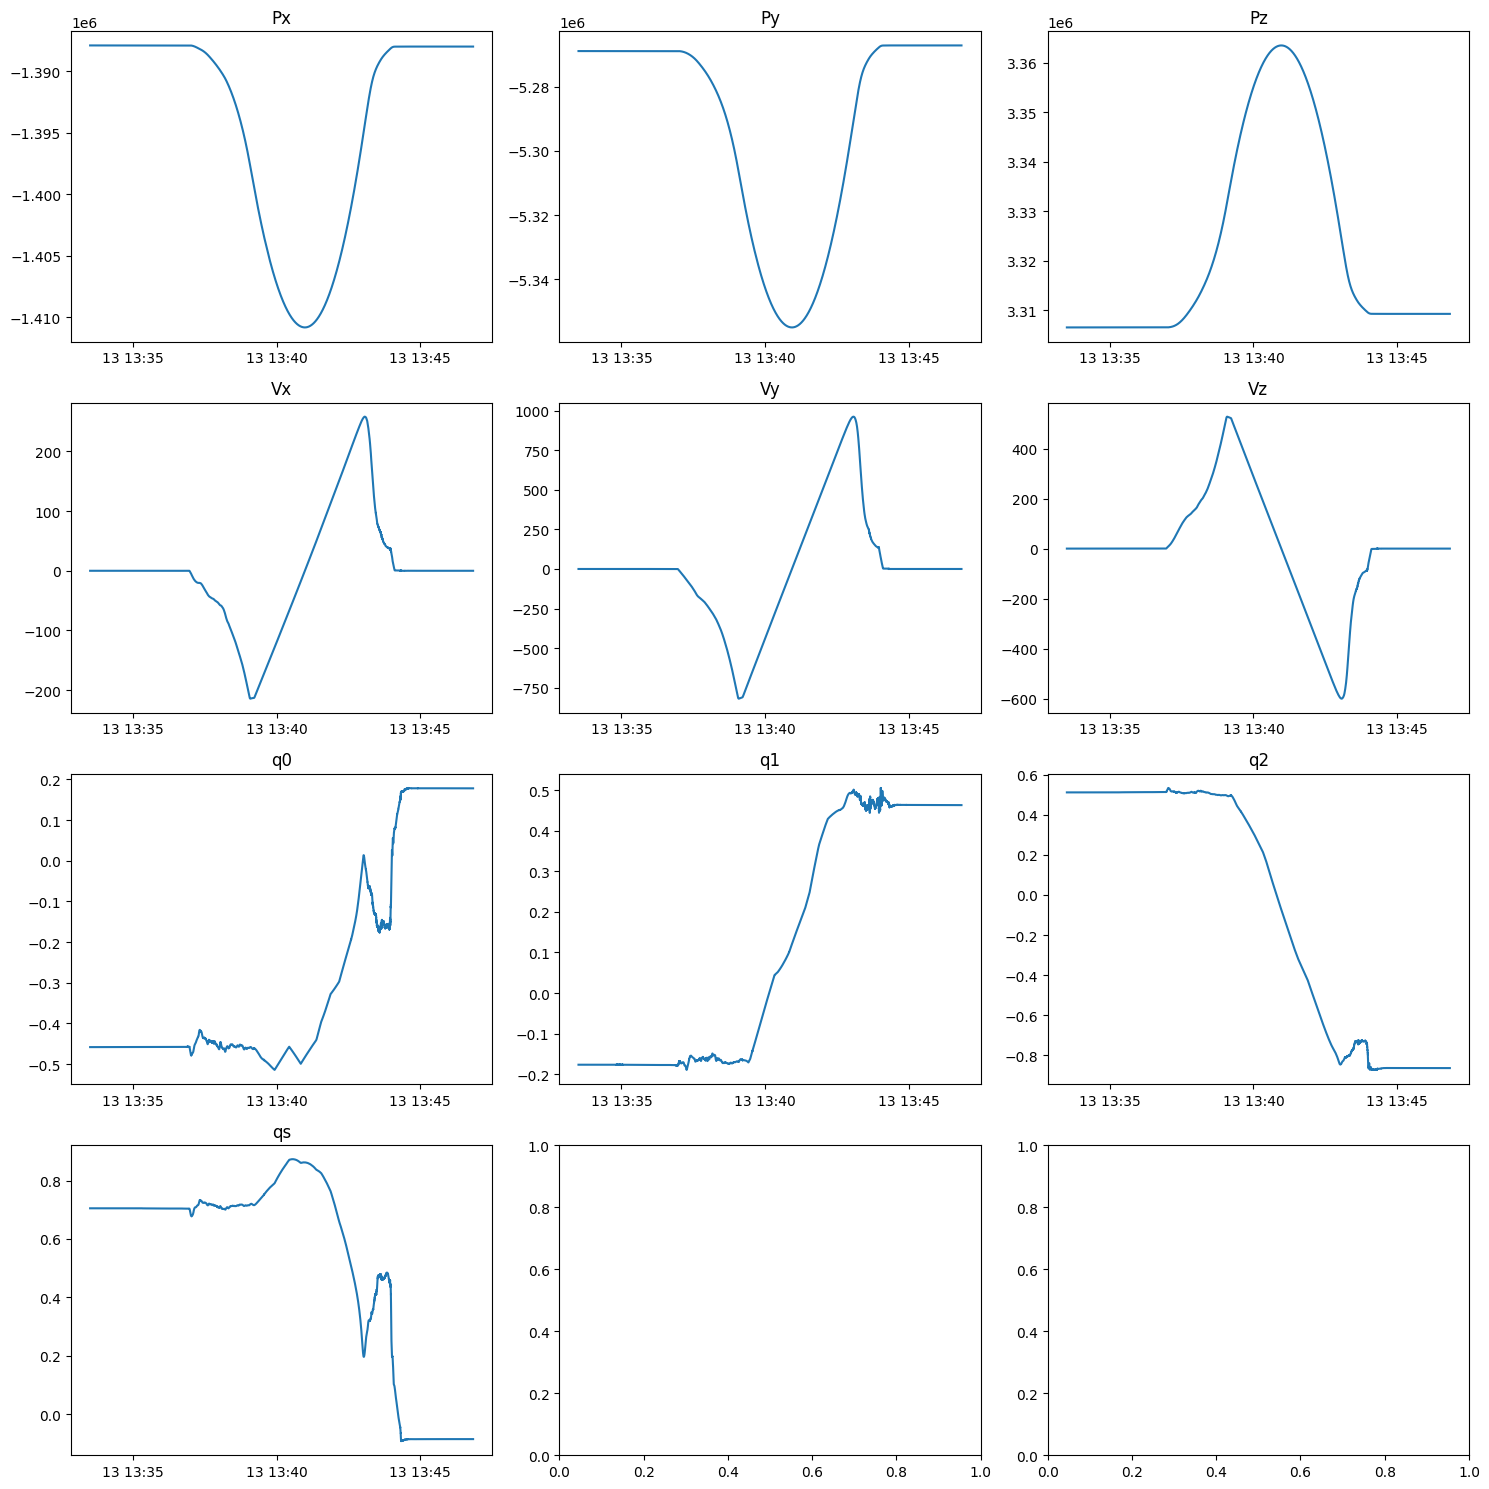

In [7]:

fig, axs = plt.subplots(4, 3, figsize=(15, 15))
axs = axs.flatten()
columns = tdf.columns

for col, ax in zip(columns, axs):
    ax.plot(tdf.index, tdf[col])
    ax.set_title(col)

plt.tight_layout()
plt.show()

In [8]:
def df_to_X_y3(df, window_size=7):
  df_as_np = df.to_numpy()
  X, y = [], []
  for i in range(len(df_as_np)-window_size):
    row = [r for r in df_as_np[i:i+window_size]]
    X.append(row)
    label = [df_as_np[i+window_size][0], df_as_np[i+window_size][1], df_as_np[i+window_size][2],
             df_as_np[i+window_size][3], df_as_np[i+window_size][4], df_as_np[i+window_size][5],
             df_as_np[i+window_size][6], df_as_np[i+window_size][7], df_as_np[i+window_size][8],
             df_as_np[i+window_size][9]]
    y.append(label)
  return np.array(X), np.array(y)

In [9]:
X3, y3 = df_to_X_y3(tdf)
X3.shape, y3.shape

((79991, 7, 10), (79991, 10))

In [10]:
X3_train, y3_train = X3[:60000], y3[:60000]
X3_val, y3_val = X3[60000:69000], y3[60000:69000]
X3_test, y3_test = X3[69000:], y3[69000:]
X3_train.shape, y3_train.shape, X3_val.shape, y3_val.shape, X3_test.shape, y3_test.shape

((60000, 7, 10),
 (60000, 10),
 (9000, 7, 10),
 (9000, 10),
 (10991, 7, 10),
 (10991, 10))

In [11]:
Px_training_mean3 = np.mean(X3_train[:, :, 0])
Px_training_std3 = np.std(X3_train[:, :, 0])

Py_training_mean3 = np.mean(X3_train[:, :, 1])
Py_training_std3 = np.std(X3_train[:, :, 1])

Pz_training_mean3 = np.mean(X3_train[:, :, 2])
Pz_training_std3 = np.std(X3_train[:, :, 2])

Vx_training_mean3 = np.mean(X3_train[:, :, 3])
Vx_training_std3 = np.std(X3_train[:, :, 3])

Vy_training_mean3 = np.mean(X3_train[:, :, 4])
Vy_training_std3 = np.std(X3_train[:, :, 4])

Vz_training_mean3 = np.mean(X3_train[:, :, 5])
Vz_training_std3 = np.std(X3_train[:, :, 5])

q0_training_mean3 = np.mean(X3_train[:, :, 6])
q0_training_std3 = np.std(X3_train[:, :, 6])

q1_training_mean3 = np.mean(X3_train[:, :, 7])
q1_training_std3 = np.std(X3_train[:, :, 7])

q2_training_mean3 = np.mean(X3_train[:, :, 8])
q2_training_std3 = np.std(X3_train[:, :, 8])

qs_training_mean3 = np.mean(X3_train[:, :, 9])
qs_training_std3 = np.std(X3_train[:, :, 9])

def preprocess3(X):
  X[:, :, 0] = (X[:, :, 0] - Px_training_mean3) / Px_training_std3
  X[:, :, 1] = (X[:, :, 1] - Py_training_mean3) / Py_training_std3
  X[:, :, 2] = (X[:, :, 2] - Pz_training_mean3) / Pz_training_std3
  X[:, :, 3] = (X[:, :, 3] - Vx_training_mean3) / Vx_training_std3
  X[:, :, 4] = (X[:, :, 4] - Vy_training_mean3) / Vy_training_std3
  X[:, :, 5] = (X[:, :, 5] - Vz_training_mean3) / Vz_training_std3
  X[:, :, 6] = (X[:, :, 6] - q0_training_mean3) / q0_training_std3
  X[:, :, 7] = (X[:, :, 7] - q1_training_mean3) / q1_training_std3
  X[:, :, 8] = (X[:, :, 8] - q2_training_mean3) / q2_training_std3
  X[:, :, 9] = (X[:, :, 9] - qs_training_mean3) / qs_training_std3
  return X

def preprocess_output3(y):
  y[:, 0] = (y[:, 0] - Py_training_mean3) / Px_training_std3
  y[:, 1] = (y[:, 1] - Py_training_mean3) / Py_training_std3
  y[:, 2] = (y[:, 2] - Py_training_mean3) / Pz_training_std3
  y[:, 3] = (y[:, 3] - Vy_training_mean3) / Vx_training_std3
  y[:, 4] = (y[:, 4] - Vy_training_mean3) / Vy_training_std3
  y[:, 5] = (y[:, 5] - Vy_training_mean3) / Vz_training_std3
  y[:, 6] = (y[:, 6] - q0_training_mean3) / q0_training_std3
  y[:, 7] = (y[:, 7] - q1_training_mean3) / q1_training_std3
  y[:, 8] = (y[:, 8] - q2_training_mean3) / q2_training_std3
  y[:, 9] = (y[:, 9] - qs_training_mean3) / qs_training_std3
  return y

In [12]:
preprocess3(X3_train)
preprocess3(X3_val)
preprocess3(X3_test)

array([[[ 0.88841304,  0.9480386 , -0.78902835, ...,  1.96671191,
         -2.30479809, -6.10498493],
        [ 0.88841304,  0.9480386 , -0.78902836, ...,  1.96670849,
         -2.3047995 , -6.10498551],
        [ 0.88841304,  0.9480386 , -0.78902836, ...,  1.96670873,
         -2.30479938, -6.10497609],
        ...,
        [ 0.88841304,  0.94803861, -0.78902837, ...,  1.9667054 ,
         -2.30480057, -6.10496314],
        [ 0.88841304,  0.94803861, -0.78902838, ...,  1.96670126,
         -2.30480268, -6.10496425],
        [ 0.88841304,  0.94803861, -0.78902838, ...,  1.96670133,
         -2.3048026 , -6.10496249]],

       [[ 0.88841304,  0.9480386 , -0.78902836, ...,  1.96670849,
         -2.3047995 , -6.10498551],
        [ 0.88841304,  0.9480386 , -0.78902836, ...,  1.96670873,
         -2.30479938, -6.10497609],
        [ 0.88841304,  0.94803861, -0.78902837, ...,  1.96671096,
         -2.30479935, -6.1049747 ],
        ...,
        [ 0.88841304,  0.94803861, -0.78902838, ...,  

In [13]:
preprocess_output3(y3_train)
preprocess_output3(y3_val)
preprocess_output3(y3_test)

array([[442.78903793,   0.94803861, 392.60406302, ...,   1.96669849,
         -2.30480342,  -6.10495241],
       [442.78903793,   0.94803862, 392.60406301, ...,   1.96669105,
         -2.30480608,  -6.10494902],
       [442.78903793,   0.94803862, 392.60406301, ...,   1.96669382,
         -2.30480536,  -6.10493959],
       ...,
       [442.78904773,   0.94804042, 392.60406174, ...,   1.96496108,
         -2.30538294,  -6.10371106],
       [442.78904774,   0.94804042, 392.60406174, ...,   1.96495833,
         -2.30538377,  -6.10371433],
       [442.78904774,   0.94804042, 392.60406175, ...,   1.96496669,
         -2.3053809 ,  -6.10370922]])

In [14]:
"""
model5 = Sequential()
model5.add(InputLayer((9, 10)))
model5.add(LSTM(64))
model5.add(Dense(32, 'relu'))
model5.add(Dense(16, 'relu'))
model5.add(Dense(10, 'linear'))
"""

model5 = Sequential()
model5.add(InputLayer((7, 10)))
model5.add(LSTM(32, activation='relu', return_sequences = True))
model5.add(LSTM(64))
#model5.add(Dropout(0.2))
model5.add(Dense(16, 'relu'))
#model5.add(Dropout(0.2))
model5.add(Dense(10, 'linear'))


'''
model5 = Sequential()
model5.add(Dense(
    64, activation = 'relu', input_shape = (10, 10)
))

model5.add(Dense(
    32, activation = 'relu'
))
model5.add(Dense(
    10, activation = 'sigmoid'
))
'''
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 32)             5504      
                                                                 
 lstm_1 (LSTM)               (None, 64)                24832     
                                                                 
 dense (Dense)               (None, 16)                1040      
                                                                 
 dense_1 (Dense)             (None, 10)                170       
                                                                 
Total params: 31546 (123.23 KB)
Trainable params: 31546 (123.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
cp5 = ModelCheckpoint('model5/', save_best_only=True)
model5.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [16]:
model5.fit(X3_train, y3_train, validation_data=(X3_val, y3_val), epochs=30)#, callbacks=[cp5])

Epoch 1/30
1875/1875 [==============================] - 22s 10ms/step - loss: 29364.3438 - root_mean_squared_error: 171.3602 - val_loss: 23018.2656 - val_root_mean_squared_error: 151.7179
Epoch 2/30
1875/1875 [==============================] - 16s 9ms/step - loss: 16014.4062 - root_mean_squared_error: 126.5481 - val_loss: 9498.0244 - val_root_mean_squared_error: 97.4581
Epoch 3/30
1875/1875 [==============================] - 17s 9ms/step - loss: 4944.1450 - root_mean_squared_error: 70.3146 - val_loss: 1701.7085 - val_root_mean_squared_error: 41.2518
Epoch 4/30
1875/1875 [==============================] - 16s 9ms/step - loss: 579.7859 - root_mean_squared_error: 24.0787 - val_loss: 90.0345 - val_root_mean_squared_error: 9.4886
Epoch 5/30
1875/1875 [==============================] - 17s 9ms/step - loss: 19.2259 - root_mean_squared_error: 4.3847 - val_loss: 6.0807 - val_root_mean_squared_error: 2.4659
Epoch 6/30
1875/1875 [==============================] - 17s 9ms/step - loss: 1.0300 - roo

In [23]:
predictions = model5.predict(X3_test)

def plot_predictions2(model, X, y, start=0, end=10000):

  Px_preds, Py_preds, Pz_preds = predictions[:, 0], predictions[:, 1], predictions[:, 2]
  Vx_preds, Vy_preds, Vz_preds = predictions[:, 3], predictions[:, 4], predictions[:, 5]
  q0_preds, q1_preds, q2_preds, qs_preds = predictions[:, 6], predictions[:, 7], predictions[:, 8], predictions[:, 9]

  Px_actuals, Py_actuals, Pz_actuals = y[:, 0], y[:, 1], y[:, 2]
  Vx_actuals, Vy_actuals, Vz_actuals = y[:, 3], y[:, 4], y[:, 5]
  q0_actuals, q1_actuals, q2_actuals, qs_actuals = y[:, 6], y[:, 7], y[:, 8], y[:, 9]

  df = pd.DataFrame(data={'Px_preds':Px_preds, 'Px_actuals':Px_actuals, 'Py_preds':Py_preds, 'Py_actuals':Py_actuals, 'Pz_preds':Pz_preds, 'Pz_actuals':Pz_actuals,
                          'Vx_preds':Vx_preds, 'Vx_actuals':Vx_actuals, 'Vy_preds':Vy_preds, 'Vy_actuals':Vy_actuals, 'Vz_preds':Vz_preds, 'Vz_actuals':Vz_actuals,
                          'q0_preds':q0_preds, 'q0_actuals':q0_actuals, 'q1_preds':q1_preds, 'q1_actuals':q1_actuals, 'q2_preds':q2_preds, 'q2_actuals':q2_actuals,'qs_preds':qs_preds, 'qs_actuals':qs_actuals,
                          })

  fig, axs = plt.subplots(4, 3, figsize=(15, 15))
  axs[0, 0].plot(df['Px_preds'])
  axs[0, 0].plot(df['Px_actuals'])
  axs[0, 1].plot(df['Py_preds'])
  axs[0, 1].plot(df['Py_actuals'])
  axs[0, 2].plot(df['Pz_preds'])
  axs[0, 2].plot(df['Pz_actuals'])
  axs[1, 0].plot(df['Vx_preds'])
  axs[1, 0].plot(df['Vx_actuals'])
  axs[1, 1].plot(df['Vy_preds'])
  axs[1, 1].plot(df['Vy_actuals'])
  axs[1, 2].plot(df['Vz_preds'])
  axs[1, 2].plot(df['Vz_actuals'])
  axs[2, 0].plot(df['q0_preds'])
  axs[2, 0].plot(df['q0_actuals'])
  axs[2, 1].plot(df['q1_preds'])
  axs[2, 1].plot(df['q1_actuals'])
  axs[2, 2].plot(df['q2_preds'])
  axs[2, 2].plot(df['q2_actuals'])
  axs[3, 0].plot(df['qs_preds'])
  axs[3, 0].plot(df['qs_actuals'])

  return df[start:end]

344/344 [==============================] - 2s 5ms/step


,Px_preds,Px_actuals,Py_preds,Py_actuals,Pz_preds,Pz_actuals,Vx_preds,Vx_actuals,Vy_preds,Vy_actuals,Vz_preds,Vz_actuals,q0_preds,q0_actuals,q1_preds,q1_actuals,q2_preds,q2_actuals,qs_preds,qs_actuals
0,440.488251,442.789038,0.788101,0.948039,390.539307,392.604063,0.760416,0.063217,1.007295,0.016698,-0.883207,0.026294,2.175173,5.062795,1.546429,1.966698,-1.576877,-2.304803,-2.296316,-6.104952
1,440.488220,442.789038,0.788096,0.948039,390.539337,392.604063,0.760423,0.063216,1.007289,0.016698,-0.883206,0.026294,2.175169,5.062785,1.546427,1.966691,-1.576873,-2.304806,-2.296319,-6.104949
2,440.488220,442.789038,0.788097,0.948039,390.539307,392.604063,0.760411,0.063215,1.007293,0.016698,-0.883203,0.026294,2.175170,5.062789,1.546429,1.966694,-1.576877,-2.304805,-2.296314,-6.104940
3,440.488220,442.789038,0.788098,0.948039,390.539337,392.604063,0.760415,0.063216,1.007291,0.016698,-0.883204,0.026294,2.175169,5.062775,1.546427,1.966689,-1.576873,-2.304808,-2.296313,-6.104937
4,440.488251,442.789038,0.788098,0.948039,390.539337,392.604063,0.760409,0.063213,1.007295,0.016698,-0.883201,0.026294,2.175166,5.062774,1.546427,1.966684,-1.576875,-2.304809,-2.296311,-6.104927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,440.489716,442.789046,0.788152,0.948040,390.540558,392.604061,0.760279,0.063122,1.007168,0.016662,-0.883086,0.026279,2.174927,5.061783,1.546313,1.965111,-1.576773,-2.305332,-2.296137,-6.103769
9996,440.489716,442.789046,0.788152,0.948040,390.540558,392.604061,0.760279,0.063122,1.007166,0.016662,-0.883082,0.026279,2.174925,5.061795,1.546311,1.965117,-1.576769,-2.305330,-2.296135,-6.103765
9997,440.489746,442.789046,0.788149,0.948040,390.540588,392.604061,0.760273,0.063124,1.007164,0.016663,-0.883080,0.026279,2.174923,5.061786,1.546309,1.965110,-1.576770,-2.305332,-2.296134,-6.103770
9998,440.489716,442.789046,0.788152,0.948040,390.540558,392.604061,0.760282,0.063123,1.007170,0.016662,-0.883084,0.026279,2.174923,5.061776,1.546313,1.965111,-1.576771,-2.305332,-2.296136,-6.103776


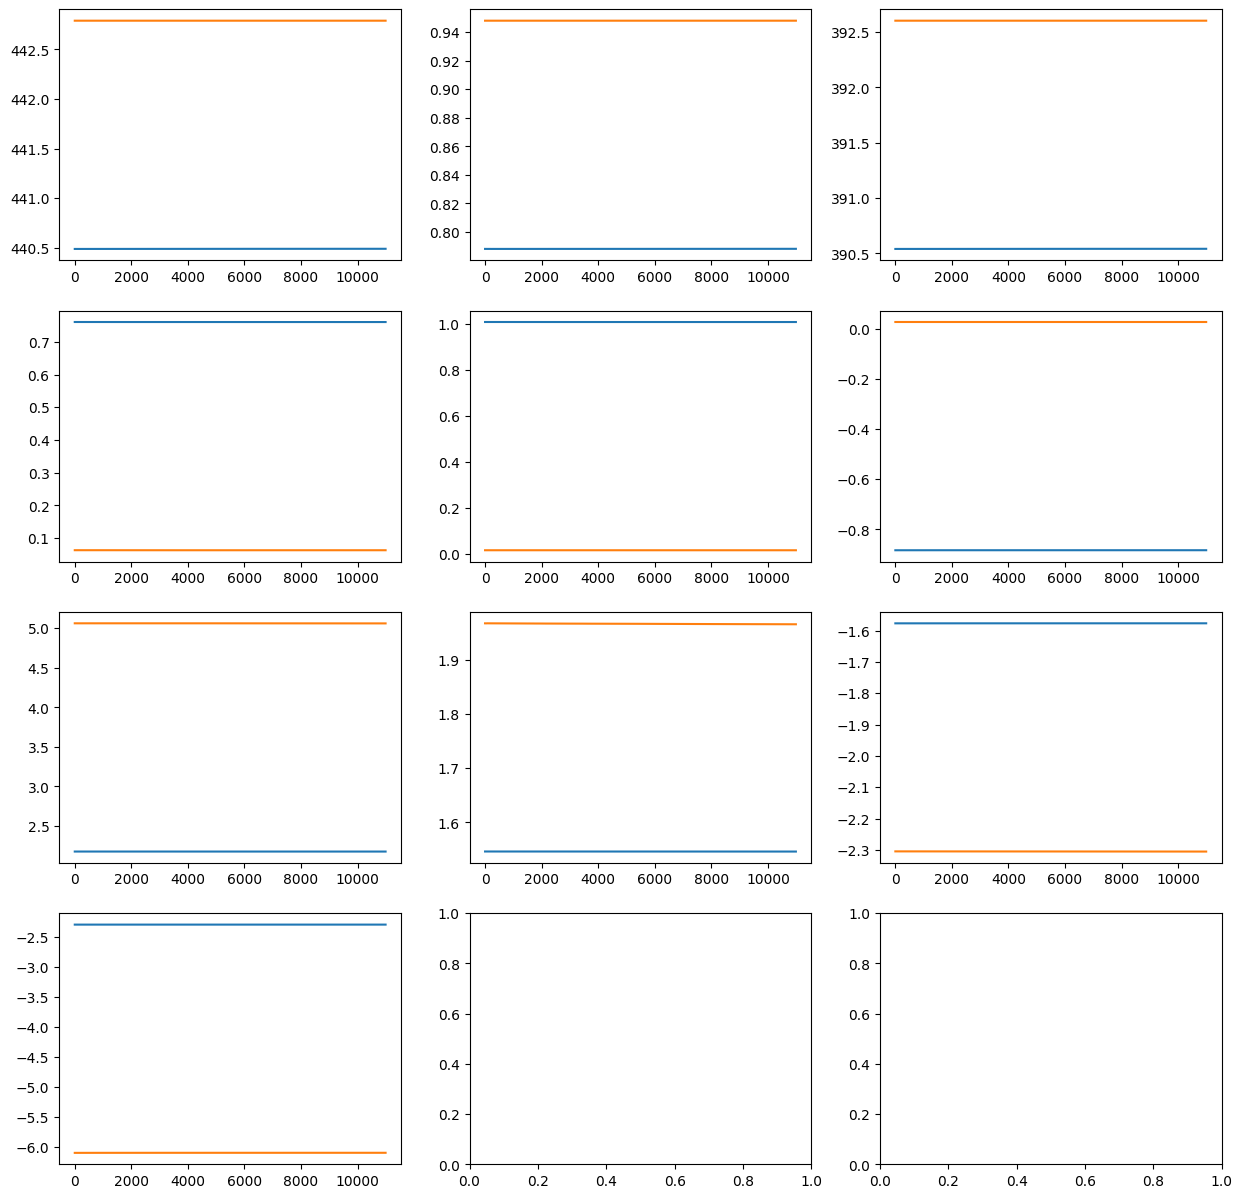

In [18]:
plot_predictions2(model5, X3_test, y3_test)

In [24]:

reco_error_mse = np.mean(np.power(y3_test - predictions, 2), axis=1)
#data['anomaly_score'] = mse
reco_error_mse
len(reco_error_mse)

10991

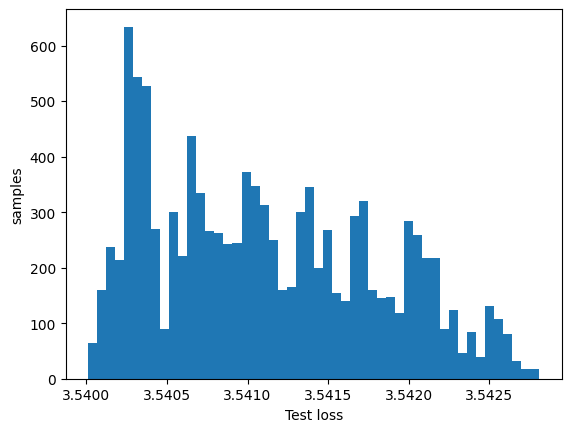

In [25]:
train_loss = tf.keras.losses.mse(predictions, y3_test)

plt.hist(train_loss[None,:], bins=50)
plt.xlabel('Test loss')
plt.ylabel('samples')
plt.show()

In [26]:
threshold = np.percentile(reco_error_mse, 99)
print('Threshold: ',threshold)
anomaly = (reco_error_mse > threshold).astype(int)
anomaly = pd.DataFrame(anomaly)
anomaly

Threshold:  3.542609033268604


,0
0,1
1,1
2,1
3,1
4,1
...,...
10986,0
10987,0
10988,0
10989,0


In [27]:
anomaly.value_counts()

0    10881
1      110
Name: count, dtype: int64

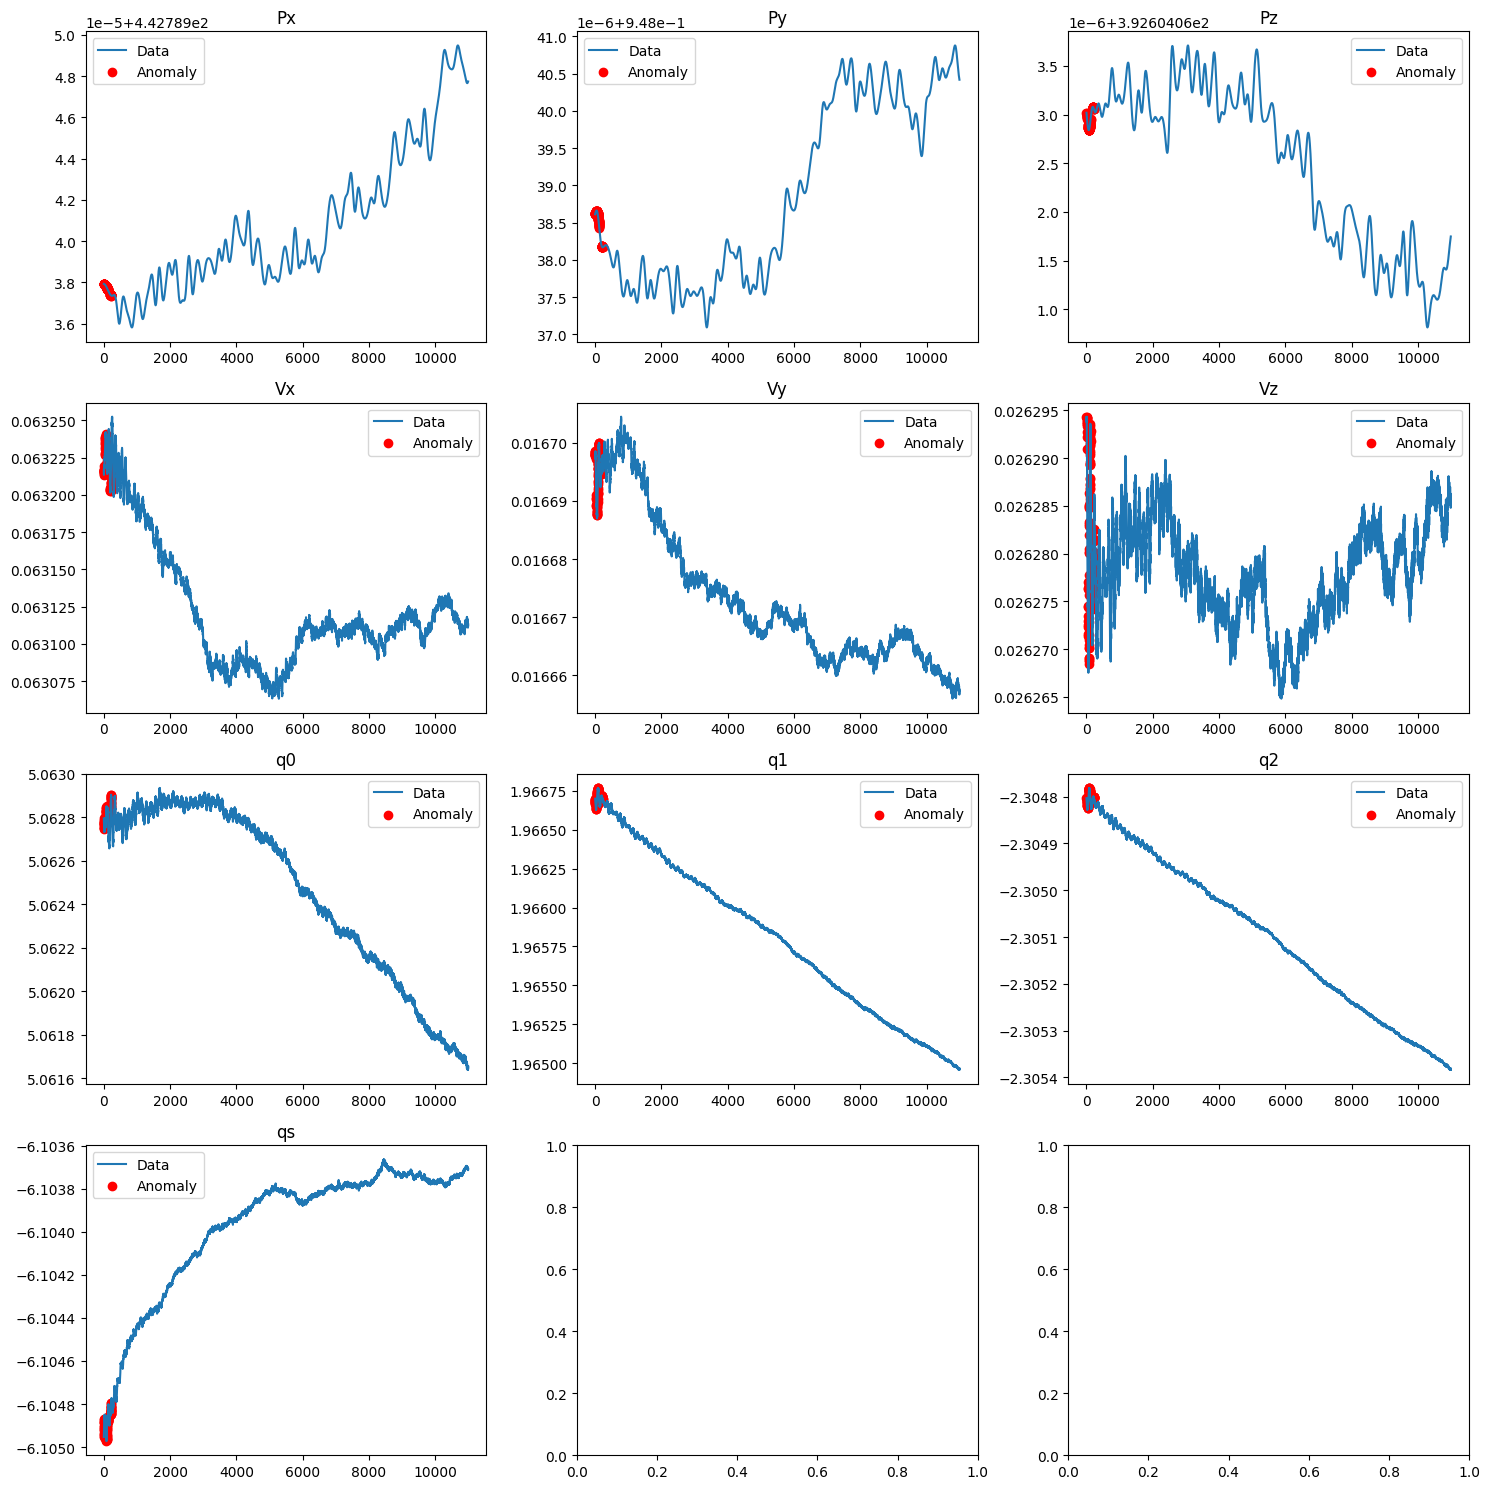

In [30]:
def plot_anomalies(data, anomalies, threshold):
    fig, axs = plt.subplots(4, 3, figsize=(15, 15))
    axs = axs.flatten()
    columns = data.columns

    for col, ax in zip(columns, axs):
        ax.plot(data.index, data[col], label='Data')
        anomaly_indices = np.where(anomalies == 1)[0]
        ax.scatter(data.index[anomaly_indices], data.iloc[anomaly_indices][col], color='red', label='Anomaly')
        ax.set_title(col)
        ax.legend()

    plt.tight_layout()
    plt.show()

test_data = pd.DataFrame(y3_test, columns = ['Px', 'Py', 'Pz', 'Vx', 'Vy', 'Vz', 'q0', 'q1', 'q2', 'qs'])
plot_anomalies(test_data, anomaly, threshold)